# Support Vector Classification
Using sklearn to train support vector machine classifiers and using the learned models to visualize simple and complex decision boundaries.

In [1]:
import numpy as np
import scipy.optimize as op
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
mat = scipy.io.loadmat('ex6data1.mat')

In [3]:
X = mat['X']
y = mat['y'].ravel()
colors = sns.color_palette()

In [4]:
def plot_data(X, y, ax):
    
    # Separates and plots x data by class y.
    
    X1_pos = X[:,0][y==1]
    X1_neg = X[:,0][y==0]
    
    X2_pos = X[:,1][y==1]
    X2_neg = X[:,1][y==0]
    
    ax.scatter(X1_pos, X2_pos, color= colors[2], s=50)
    ax.scatter(X1_neg, X2_neg, color= colors[0], s=50)
    
    plt.legend(['Positive', 'Negative'])

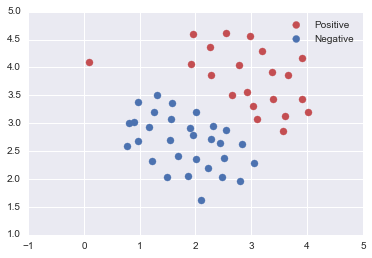

In [5]:
# Data is linearly separable with positive outlier in upper left quadrant.

fig = plt.figure()
ax = plt.subplot(111)
plot_data(X, y, ax)

In [6]:
from sklearn.svm import SVC

In [7]:
# Instantiate two svc models with very different values for the C parameter.
# C functions similarly to 1/lambda in other ml models. 
# A large C parameter will preform better on training data but will tend to overfit.

svc_model_1 = SVC(C=1, kernel = 'linear')
svc_model_2 = SVC(C=100, kernel = 'linear')

In [8]:
# Train models

svc_model_1.fit(X, y)
svc_model_2.fit(X, y);

In [9]:
print("Model 1's predicted accuracy: {:.2f}%\nModel 2's predicted accuracy: {:.2f}%".format(svc_model_1.score(X, y)*100,
                                                                                  svc_model_2.score(X, y) * 100))

Model 1's predicted accuracy: 98.04%
Model 2's predicted accuracy: 100.00%


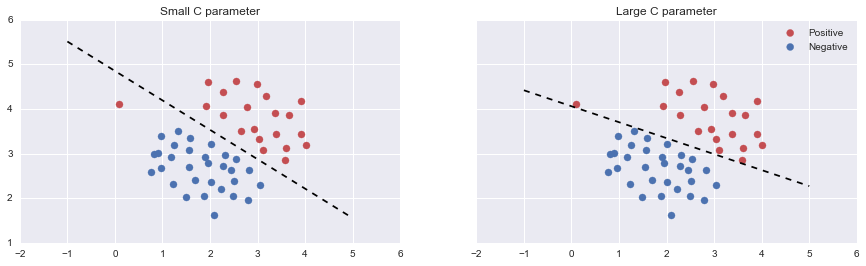

In [10]:
# Visualize decision boundary for each model.

models = [svc_model_1, svc_model_2]
titles = ['Small C parameter', 'Large C parameter']
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 4))

for i in range(len(models)):
    
    # Find coefficients and intercept.
    x1 = models[i].coef_[0][0]
    x2 = models[i].coef_[0][1]
    b = models[i].intercept_[0]
    
    # Use coefficients to form equation for linear margin.
    x = np.linspace(-1, 5, 50)
    y_plot = (x*x1 + b)/(-x2)

    plot_data(X, y, axs[i])
    axs[i].set_title(titles[i])
    axs[i].plot(x, y_plot, '--', color = 'black')

A large value of C (right plot) will try to correctly classify all the data even at the risk of forming a decision boundary that does not have the largest margin and doesn't fit the overall trend of the data as well. A small value howerver will produce a large margin even if it must incorrectly classify a few points to do so. Making it more robust to outliers.

In [11]:
mat = scipy.io.loadmat('ex6data2.mat')

In [12]:
X = mat['X']
y = mat['y'].ravel()
y_colors = [colors[2] if i == 1 else colors[0] for i in y]

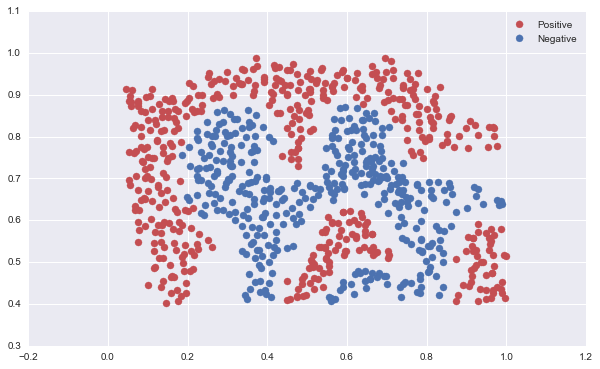

In [13]:
# Non linearly separable data requires a more complex kernel.

plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plot_data(X, y, ax)

In [14]:
# Instantiate and fit the model.

# The gamma parameter controls how far the influence of an ovservation reaches.
# If the gamma parameter is large the points closest to the boundary will have the most influence.
# If the parameter is small all points (even those far away from the db) will share influence.

svc_model_1 = SVC(C=100, kernel = 'rbf', gamma=0.1)
svc_model_1.fit(X, y)

svc_model_2 = SVC(C=100, kernel = 'rbf', gamma = 10)
svc_model_2.fit(X, y);

In [15]:
print("Model 1's predicted accuracy: {:.2f}%\nModel 2's predicted accuracy: {:.2f}%".format(svc_model_1.score(X, y)*100,
                                                                                  svc_model_2.score(X, y) * 100))

Model 1's predicted accuracy: 81.11%
Model 2's predicted accuracy: 96.99%


In [16]:
def plot_contour(clf, xx, yy, ax):
   
    # Visualize decision boundary using contour plot.
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, [0], colors='black', linestyles = 'dashed')

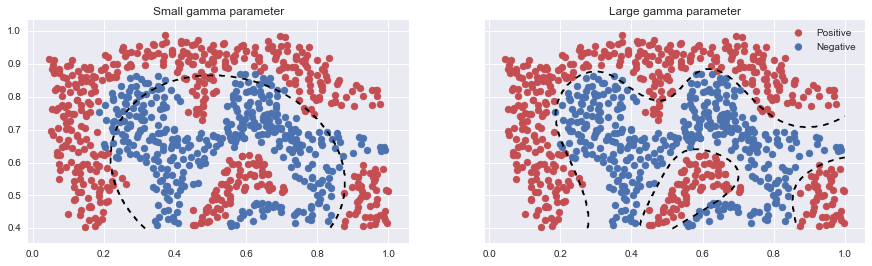

In [17]:
# Visualize decision boundary for each model

x = np.linspace(.1, 1, 500)
y_ = np.linspace(.4, 1, 500)
xx, yy = np.meshgrid(x, y_)

models = [svc_model_1, svc_model_2]
titles = ['Small gamma parameter', 'Large gamma parameter']
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 4))

for i in range(len(models)):

    plot_data(X, y, axs[i])
    plot_contour(models[i], xx, yy, axs[i])
    axs[i].set_title(titles[i])

In [18]:
mat = scipy.io.loadmat('ex6data3.mat')

In [19]:
X = mat['X']
y = mat['y'].ravel()
y_colors = [colors[2] if i == 1 else colors[0] for i in y]

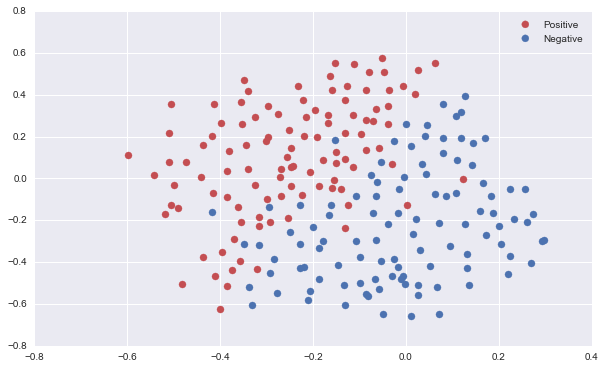

In [20]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plot_data(X, y, ax)

In [21]:
# Instantiate and fit the models.

svc_model_1 = SVC(C=100, kernel = 'rbf', gamma=0.1)
svc_model_1.fit(X, y)

svc_model_2 = SVC(C=100, kernel = 'rbf', gamma = 10)
svc_model_2.fit(X, y);

In [22]:
print("Model 1's predicted accuracy: {:.2f}%\nModel 2's predicted accuracy: {:.2f}%".format(svc_model_1.score(X, y)*100,
                                                                                  svc_model_2.score(X, y) * 100))

Model 1's predicted accuracy: 92.42%
Model 2's predicted accuracy: 93.84%


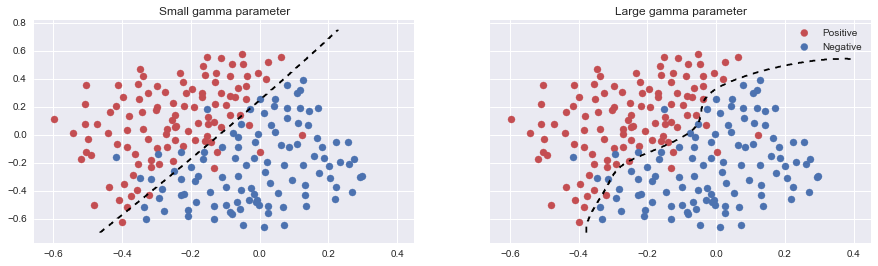

In [23]:
# Visualize decision boundary for each model.

x = np.linspace(-0.6, .4, 500)
y_ = np.linspace(-0.7, .75, 500)
xx, yy = np.meshgrid(x, y_)

models = [svc_model_1, svc_model_2]
titles = ['Small gamma parameter', 'Large gamma parameter']
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 4))

for i in range(len(models)):

    plot_data(X, y, axs[i])
    plot_contour(models[i], xx, yy, axs[i])
    axs[i].set_title(titles[i])